<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Многослойная-сеть-на-PyTorch" data-toc-modified-id="Многослойная-сеть-на-PyTorch-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><b>Многослойная сеть на PyTorch</b></a></span><ul class="toc-item"><li><span><a href="#Компоненты-нейросети" data-toc-modified-id="Компоненты-нейросети-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span><b>Компоненты нейросети</b></a></span></li><li><span><a href="#Многослойная-нейронная-сеть" data-toc-modified-id="Многослойная-нейронная-сеть-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span><b>Многослойная нейронная сеть</b></a></span><ul class="toc-item"><li><span><a href="#Forward-pass-в-MLP" data-toc-modified-id="Forward-pass-в-MLP-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Forward pass в MLP</a></span></li></ul></li><li><span><a href="#Многослойная-нейросеть-на-PyTorch" data-toc-modified-id="Многослойная-нейросеть-на-PyTorch-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span><b>Многослойная нейросеть на PyTorch</b></a></span></li><li><span><a href="#Полезные-ссылки" data-toc-modified-id="Полезные-ссылки-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span><b>Полезные ссылки</b></a></span></li></ul></li></ul></div>

---

<h2 style="text-align: center;"><b>Многослойная сеть на PyTorch</b></h3>

---

В этом ноутбке мы научимся писать свои нейросети на фреймворке PyTorch, конкретно - рассмотрим, как написать многослойную полносвязную сеть (Fully-Connected, FC).

<h3 style="text-align: center;"><b>Компоненты нейросети</b></h3>

Здесь самое время напомнить о том, какие вещи играют принципиальную роль в построении любой ***нейронной сети*** (все их мы задаём *руками*, самостоятельно):  

- непосредственно, сама **архитектура** нейросети (сюда входят типы функций активации у каждого нейрона);
- начальная **инициализация** весов каждого слоя;
- метод **оптимизации** нейросети (сюда ещё входит метод изменения `learning_rate`);
- размер **батчей** (`batch_size`);
- количество итераций обучения (`num_epochs`);
- **функция потерь** (`loss`);  
- тип **регуляризации** нейросети (для каждого слоя можно свой);  

То, что связано с ***данными и задачей***:  
- само **качество** выборки (непротиворечивость, чистота, корректность постановки задачи);  
- **размер** выборки;  

<h3 style="text-align: center;"><b>Многослойная нейронная сеть</b></h3>

Как можно понять из названия, многослойная нейросеть состоит из нескольких **слоёв**. Каждый слой состоит из **нейронов**. Ранее мы уже писали свой нейрон на NumPy, вот из таких нейронов и состоит ***MLP (Multi-Layer Perceptron)***. Ещё такую многослойную нейросеть, у которой каждый нейрон на предыдущем уровне соединён с нейроном на следующем уровне, называют ***Fully-Connected-сетью*** (или ***Dense-сетью***).  

Расмотрим их устройство более подробно:

* Вот так выглядит двухслойная нейросеть (первый слой - input layer - не считается, потому что это, по сути, не слой):

<img src="http://cs231n.github.io/assets/nn1/neural_net.jpeg" width=300, height=200>

* Так выглядит трёхслойная нейросеть:

<img src="http://cs231n.github.io/assets/nn1/neural_net2.jpeg" width=400, height=300>

.. и так далее для большего случая слоёв.

**Обратите внимание:** связи есть у нейронов со слоя $L_{i-1}$  и нейронов $L_{i}$, но между нейронами в одном слое связей **нет**.

**Входной слой** -- это данные (матрица $(n, m)$).

Слои, которые не являются входными или выходными, называются **скрытыми слоями (hidden layers)**.

При решении ***задачи регрессии*** на **выходном слое** обычно один нейрон, который возвращает предсказанные числа (для каждого объекта по числу).  

В случае ***задачи классификации*** на **выходном слое** обычно один нейрон, если задача бинарной классификации, и $K$ нейронов, если задача $K$-класовой классификации.

#### Forward pass в MLP

Каждый слой многослойной нейросети - это матрица весов, столбцы которой -- это нейроны (один столбец - один нейрон). То есть один столбец -- это веса одного нейрона.

Допустим, мы решаем задачу $K$-классовой классификации (на последнем слое $K$ нейронов). Рассмотрим, как в таком случае выглядит `forward_pass` нейросети:

* Вход: $$X =
\left(
\begin{matrix} 
x_{11} & ... & x_{1M} \\
... & \ddots  & ...\\
x_{N1} & ... & x_{NM} 
\end{matrix}
\right)
$$

-- матрица $(N, M)$

* Структура сети - много слоёв, в слоях много нейронов. Первый слой (после входного) выглядит так:

$$ W^1 =
\left(
\begin{matrix} 
w_{11} & ... & w_{1L_1} \\
... & \ddots  & ...\\
w_{M1} & ... & w_{ML_1} 
\end{matrix}
\right)
$$

-- матрица $(M, L_1)$

То есть это в точности $L_1$ нейронов, каждый имеет свои собственные веса, их $M$ штук.

Мы помним, что нейрон - это линейное преобразование и потом нелинейная функция активации от этого преобразования. Однако в многослойных нейростеях часто отделяют `Linear` часть и `Activation`, то есть слоем считаем набор весов нейронов, а следующий слой всегда функция активации (у всех нейронов из слоя она одна и та же, обычно фреймворки не позволяют задавать конкретному нейрону в слое отличную от других нейронов в этом слое функцию активации, однако это легко сделать, объявив слой из одного нейрона).

* Другие слои выглядит точно так же, как первый слой. Например, второй слой будет такой:

$$ W^2 =
\left(
\begin{matrix} 
w_{11} & ... & w_{1L_2} \\
... & \ddots  & ...\\
w_{L_11} & ... & w_{L_1L_2} 
\end{matrix}
\right)
$$

-- матрица $(L_1, L_2)$

То есть это в точности $L_2$ нейронов, каждый имеет свои собственные веса, их $L_1$ штук.

* Выходной слой:  

Пусть в нейросети до выходного слоя идут $t$ слоёв. Тогда выходной слой имеет форму:

$$ W^{out} =
\left(
\begin{matrix} 
w_{11} & ... & w_{1K} \\
... & \ddots  & ...\\
w_{L_t1} & ... & w_{L_tK} 
\end{matrix}
\right)
$$

-- матрица $(L_t, K)$, где $L_t$ - количество нейронов в $t$-ом слое, а $K$ -- количество классов.

В итоге *для `forward_pass` нам нужно просто последовтельно перемножить матрицы друг за другом, применяя после каждого умножения соответсвующую функцию активации*.

*Примечание*: можно думать об умножении на очередную матрицу весов как на переход в **новое признаковое пространство**. Действительно, когда подаём матрицу $X$ и умножаем на матрицу первого слоя, мы получаем матрицу размера $(N, L_1)$, то есть как будто $L_1$ "новых" признаков (построенных как линейная комбинация старых до применения функции активации, и уже как нелинейная комбинация после активации). Здесь уместно вспомнить, что Deep Learning является пообластью Representation Learning, то есть позволяет выучивает новые представляения данных.

**Backward pass в MLP**

Обучается с помощью метода "Error Backpropagation" - ["Обратное распространение ошибки"](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BE%D0%B1%D1%80%D0%B0%D1%82%D0%BD%D0%BE%D0%B3%D0%BE_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%BE%D1%81%D1%82%D1%80%D0%B0%D0%BD%D0%B5%D0%BD%D0%B8%D1%8F_%D0%BE%D1%88%D0%B8%D0%B1%D0%BA%D0%B8), принцип распространения очень похож на то, как мы обучали один нейрон - это градиентный спуск, но по "всей нейросети" сразу.  

Backpropagation работает корректно благодаря ***chain rule*** (=правилу взятия производной сложной функции):  

Если $f(x) = f(g(x))$, то:  

$$\frac{\partial{f}}{\partial{x}} = \frac{\partial{f}}{\partial{g}} \frac{\partial{g}}{\partial{x}}$$

Более подробно про backpropagation можно прочитать здесь (на английском):  https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/

<h3 style="text-align: center;"><b>Многослойная нейросеть на PyTorch</b></h3>

Ешё раз напомним про основные компоненты нейросети:

- непосредственно, сама **архитектура** нейросети (сюда входят типы функций активации у каждого нейрона);
- начальная **инициализация** весов каждого слоя;
- метод **оптимизации** нейросети (сюда ещё входит метод изменения `learning_rate`);
- размер **батчей** (`batch_size`);
- количетсво **эпох** обучения (`num_epochs`);
- **функция потерь** (`loss`);  
- тип **регуляризации** нейросети (для каждого слоя можно свой);  

То, что связано с ***данными и задачей***:  
- само **качество** выборки (непротиворечивость, чистота, корректность постановки задачи);  
- **размер** выборки;  

Cоздадим двухслойную нейросеть из 100 нейронов:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import torch

Генерация и отрисовка датасета:

In [2]:
N = 100
D = 2
K = 3
X = np.zeros((N * K, D))
y = np.zeros(N * K, dtype='uint8')

for j in range(K):
    ix = range(N * j,N * (j + 1))
    r = np.linspace(0.0, 1, N)
    t = np.linspace(j * 4, (j + 1) * 4,N) + np.random.randn(N) * 0.2 # theta
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j

Не забываем оборачивать данные (без этого градиенты не посчитать):

In [3]:
X = torch.autograd.Variable(torch.FloatTensor(X))
y = torch.autograd.Variable(torch.LongTensor(y.astype(np.int64)))

In [4]:
print(X.data.shape, y.data.shape)

torch.Size([300, 2]) torch.Size([300])


Сама ячейка с нейросетью и обучением:

In [5]:
# N - размер батча (batch_size, нужно для метода оптимизации); 
# D_in - размерность входа (количество признаков у объекта);
# H - размерность скрытых слоёв; 
# D_out - размерность выходного слоя (суть - количество классов)
N, D_in, H, D_out = 64, 2, 100, 3

# Use the nn package to define our model and loss function.
two_layer_net = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

loss_fn = torch.nn.CrossEntropyLoss(size_average=False)

learning_rate = 1e-4
optimizer = torch.optim.SGD(two_layer_net.parameters(), lr=learning_rate)
for t in range(500):
    # forward
    y_pred = two_layer_net(X)

    # loss
    loss = loss_fn(y_pred, y)
    print('{} {}'.format(t, loss.data))

    # зануляем градиенты (чтобы не было остатка с редыдущего шага)
    optimizer.zero_grad()

    # backward
    loss.backward()

    # обновляем
    optimizer.step()

C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


0 326.03106689453125
1 323.58673095703125
2 321.2505798339844
3 319.009033203125
4 316.8521423339844
5 314.7715148925781
6 312.7605285644531
7 310.8138732910156
8 308.92718505859375
9 307.0967712402344
10 305.31951904296875
11 303.5927734375
12 301.91412353515625
13 300.28131103515625
14 298.69268798828125
15 297.1463623046875
16 295.6407775878906
17 294.17449951171875
18 292.7460632324219
19 291.3540954589844
20 289.9975891113281
21 288.67529296875
22 287.38616943359375
23 286.1291198730469
24 284.903076171875
25 283.7070007324219
26 282.5399475097656
27 281.40106201171875
28 280.28961181640625
29 279.2048645019531
30 278.1458740234375
31 277.11187744140625
32 276.10211181640625
33 275.1157531738281
34 274.15228271484375
35 273.2109375
36 272.2909851074219
37 271.391845703125
38 270.51287841796875
39 269.6534118652344
40 268.8129577636719
41 267.99114990234375
42 267.1873474121094
43 266.4009704589844
44 265.6317443847656
45 264.8790283203125
46 264.1424560546875
47 263.4215393066406


433 213.94471740722656
434 213.91323852539062
435 213.8817901611328
436 213.850341796875
437 213.81903076171875
438 213.7877197265625
439 213.7564697265625
440 213.72520446777344
441 213.69395446777344
442 213.66278076171875
443 213.6315460205078
444 213.60043334960938
445 213.56932067871094
446 213.53822326660156
447 213.5071563720703
448 213.47616577148438
449 213.4451141357422
450 213.4141387939453
451 213.3832550048828
452 213.3523712158203
453 213.32151794433594
454 213.29066467285156
455 213.25985717773438
456 213.22909545898438
457 213.19827270507812
458 213.16744995117188
459 213.13668823242188
460 213.10595703125
461 213.0751953125
462 213.04443359375
463 213.01368713378906
464 212.98294067382812
465 212.9522247314453
466 212.9215545654297
467 212.89089965820312
468 212.8602294921875
469 212.82968139648438
470 212.79920959472656
471 212.76876831054688
472 212.7383575439453
473 212.7079315185547
474 212.67755126953125
475 212.64718627929688
476 212.61676025390625
477 212.586364

**Обратите внимание:** несмотря на то, что это задача 3-х классовой классификации и столбец $y$ нужно по-хорошему кодировать OneHotEncoding'ом, мы подали просто столбец из 0, 1 и 2 и всё отработало. Дело в том, что PyTorch сам делает OneHot в таком случае.

Проверим, насколько хороша наша сеть из 100 нейронов:

In [6]:
# Обратно в Numpy для отрисовки
X = X.data.numpy()
y = y.data.numpy()

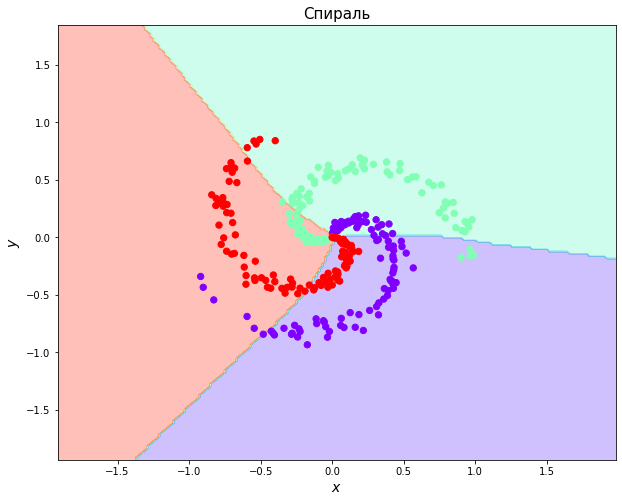

In [8]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid_tensor = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])

Z = two_layer_net(torch.autograd.Variable(grid_tensor))
Z = Z.data.numpy()
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))

plt.contourf(xx, yy, Z, cmap=plt.cm.rainbow, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.rainbow)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.title('Спираль', fontsize=15)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show();

Подберём гиперпараметры получше:

In [9]:
X = torch.autograd.Variable(torch.FloatTensor(X))
y = torch.autograd.Variable(torch.LongTensor(y.astype(np.int64)))

In [10]:
N, D_in, H, D_out = 64, 2, 100, 3

better_net = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

loss_fn = torch.nn.CrossEntropyLoss(size_average=False)

learning_rate = 1e-3
optimizer = torch.optim.SGD(better_net.parameters(), lr=learning_rate)
for t in range(1000):
    # forward
    y_pred = better_net(X)

    # loss
    loss = loss_fn(y_pred, y)
    print('{} {}'.format(t, loss.data))

    # зануляем градиенты (чтобы не было остатка с редыдущего шага)
    optimizer.zero_grad()

    # backward
    loss.backward()

    # обновляем
    optimizer.step()

0 330.5158996582031
1 328.9858093261719
2 327.5889892578125
3 326.1723937988281
4 324.7882385253906
5 323.4219970703125
6 322.0350036621094
7 320.56439208984375
8 319.0062255859375
9 317.3271179199219
10 315.4891662597656
11 313.4594421386719
12 311.2635498046875
13 308.8731994628906
14 306.26611328125
15 303.3964538574219
16 300.24969482421875
17 296.8234558105469
18 293.12176513671875
19 289.1370544433594
20 284.88775634765625
21 280.3828125
22 275.6460266113281
23 270.7464294433594
24 265.7275085449219
25 260.66259765625
26 255.63702392578125
27 250.71131896972656
28 245.9540557861328
29 241.43682861328125
30 237.1840362548828
31 233.2149658203125
32 229.54135131835938
33 226.16204833984375
34 223.0602264404297
35 220.21067810058594
36 217.58273315429688
37 215.14292907714844
38 212.868896484375
39 210.7373046875
40 208.7400360107422
41 206.875
42 205.2079620361328
43 204.06027221679688
44 204.7062225341797
45 211.8783721923828
46 244.5034942626953
47 304.55413818359375
48 359.41543

414 16.723806381225586
415 15.69296932220459
416 16.58915138244629
417 15.642627716064453
418 16.550682067871094
419 15.623122215270996
420 16.55742835998535
421 15.606149673461914
422 16.527673721313477
423 15.498377799987793
424 16.41845703125
425 15.47275447845459
426 16.397754669189453
427 15.332489967346191
428 16.23719596862793
429 15.268821716308594
430 16.174365997314453
431 15.178193092346191
432 16.06489372253418
433 15.086919784545898
434 15.968104362487793
435 15.002882957458496
436 15.894305229187012
437 14.947956085205078
438 15.820003509521484
439 14.843259811401367
440 15.713580131530762
441 14.783123016357422
442 15.795098304748535
443 15.016021728515625
444 15.951881408691406
445 14.929220199584961
446 15.854576110839844
447 14.795907020568848
448 15.688682556152344
449 14.67509651184082
450 15.54826545715332
451 14.52260684967041
452 15.356856346130371
453 14.396106719970703
454 15.213130950927734
455 14.316726684570312
456 15.125450134277344
457 14.21248722076416
45

829 8.946798324584961
830 9.866714477539062
831 9.036416053771973
832 9.678159713745117
833 9.712081909179688
834 10.032171249389648
835 11.450878143310547
836 11.405651092529297
837 14.65146255493164
838 13.222296714782715
839 16.682512283325195
840 13.458212852478027
841 16.484220504760742
842 12.014120101928711
843 14.52187728881836
844 10.871705055236816
845 12.646463394165039
846 10.489912986755371
847 12.118566513061523
848 10.34721851348877
849 11.875667572021484
850 10.165547370910645
851 11.58230972290039
852 10.122469902038574
853 11.521005630493164
854 10.120244026184082
855 11.521768569946289
856 10.126245498657227
857 11.516668319702148
858 10.125771522521973
859 11.493857383728027
860 10.098037719726562
861 11.429349899291992
862 10.052042007446289
863 11.335577964782715
864 9.969365119934082
865 11.194684028625488
866 9.894702911376953
867 11.065918922424316
868 9.811810493469238
869 10.926874160766602
870 9.715102195739746
871 10.779363632202148
872 9.620719909667969
87

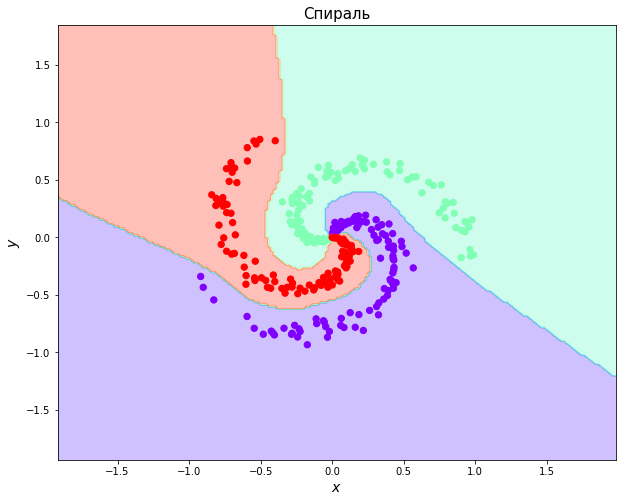

In [11]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid_tensor = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])

Z = better_net(torch.autograd.Variable(grid_tensor))
Z = Z.data.numpy()
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))

plt.contourf(xx, yy, Z, cmap=plt.cm.rainbow, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.rainbow)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.title('Спираль', fontsize=15)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show();

Предлагается самостоятельно проанализировать то, что было изменено, чтобы улучшить качество модели (и *обратить на это внимание*).

---

<h3 style="text-align: center;"><b>Полезные ссылки</b></h3>

1). *Примеры написания нейросетей на PyTorch (офийиальные туториалы) (на английском): https://pytorch.org/tutorials/beginner/pytorch_with_examples.html#examples  
https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html*

2). Курс Стэнфордского Университета:  http://cs231n.github.io/

3). Практически исчерпывающая информация по основам нейросетей (из cs231n) (на английском):  

http://cs231n.github.io/neural-networks-1/,  
http://cs231n.github.io/neural-networks-2/,  
http://cs231n.github.io/neural-networks-3/,  
http://cs231n.github.io/neural-networks-case-study/#linear

4). *Хорошие статьи по основам нейросетей (на английском):  http://neuralnetworksanddeeplearning.com/chap1.html*

5). *Наглядная демонстрация того, как обучаются нейросети:  https://cs.stanford.edu/people/karpathy/convnetjs/*

6). *Подробнее про backpropagation -- статья на Medium: https://medium.com/autonomous-agents/backpropagation-how-neural-networks-learn-complex-behaviors-9572ac161670*

7). *Статья из интернета по Backprop: http://page.mi.fu-berlin.de/rojas/neural/chapter/K7.pdf*